<a href="https://colab.research.google.com/github/chrismarkella/California-Housing-Prices/blob/master/loading_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
print(f'{sys.version_info}')
assert sys.version_info >= (3, 5), "The python version is too old. Version 3.5 or newer is required"

sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)


In [2]:
import sklearn
print(f'{sklearn.__version__}')
assert sklearn.__version__ >= "0.20", "The sklearn version is too old. Version 0.20 or newer is required"

0.21.3


In [0]:
import os

import numpy as np
import pandas as pd

import urllib
import tarfile

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master'
HOUSING_PATH = os.path.join('datasets', 'housing')

def fetch_housing_data(file_name, housing_path=HOUSING_PATH,
                       download_root=DOWNLOAD_ROOT):
    """
    Create a housing_path folder.
    Download the compressed housing file.
    Extract the tar housing file.
    Delete the downloaded housing file.
    """
    os.makedirs(name=housing_path, exist_ok=True)

    tar_path = os.path.join(housing_path, file_name)
    housing_url = os.path.join(download_root, tar_path)
    urllib.request.urlretrieve(url=housing_url, filename=tar_path)

    housing_tar = tarfile.open(name=tar_path)
    housing_tar.extractall(path=housing_path)
    housing_tar.close()

    os.remove(path=tar_path)

fetch_housing_data(file_name='housing.tgz')

!ls
!ls datasets/housing

datasets  sample_data
housing.csv


In [5]:
def load_housing_data(csv_file, housing_path=HOUSING_PATH):
    """Return a Pandas' DataFrame from the csv_file.
    """
    csv_path = os.path.join(housing_path, csv_file)
    return pd.read_csv(filepath_or_buffer=csv_path, sep=',')

df = load_housing_data(csv_file='housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

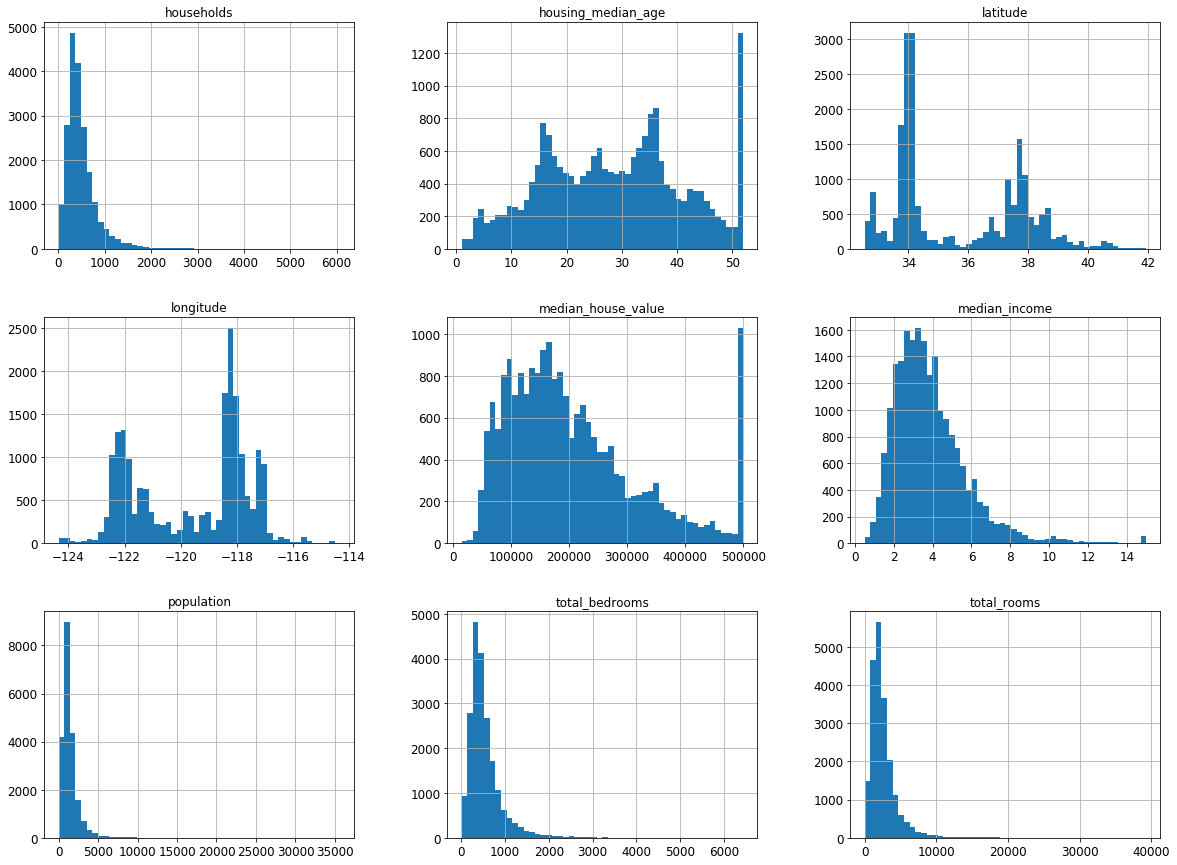

In [10]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
df['income_cat'] = pd.cut(x=df['median_income'], bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                          labels=[1,2,3,4,5])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


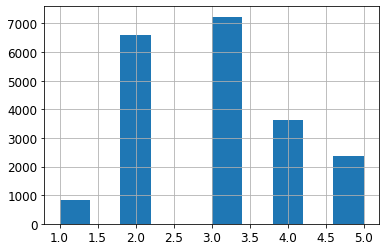

In [12]:
df['income_cat'].hist()

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X=df, y=df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [14]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [15]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [0]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(labels='income_cat', axis=1, inplace=True)

In [17]:
for set_ in (strat_train_set, strat_test_set):
    print(f'{set_.columns}')

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [0]:
df_back = df.copy()
df = strat_train_set.copy()

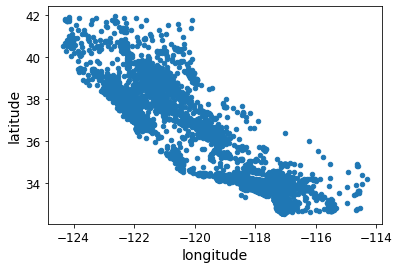

In [19]:
df.plot(kind='scatter', x='longitude', y='latitude')

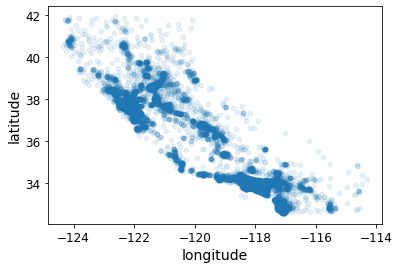

In [20]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

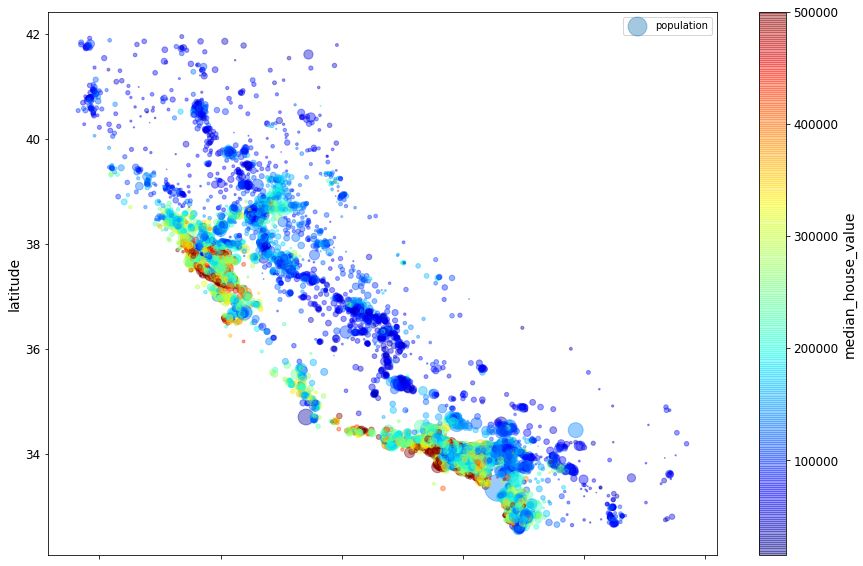

In [31]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
        s=df['population']/50, label='population', figsize=(15,10),
        c='median_house_value', cmap=plt.get_cmap(name='jet'), colorbar=True,
        )
plt.legend()

In [32]:
corr_matrix = df.corr(method='pearson')
corr_matrix['median_house_value']

longitude            -0.047432
latitude             -0.142724
housing_median_age    0.114110
total_rooms           0.135097
total_bedrooms        0.047689
population           -0.026920
households            0.064506
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [33]:
corr_matrix['median_house_value'].sort_values()

latitude             -0.142724
longitude            -0.047432
population           -0.026920
total_bedrooms        0.047689
households            0.064506
housing_median_age    0.114110
total_rooms           0.135097
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [34]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b856494e0>,
      dtype=object)

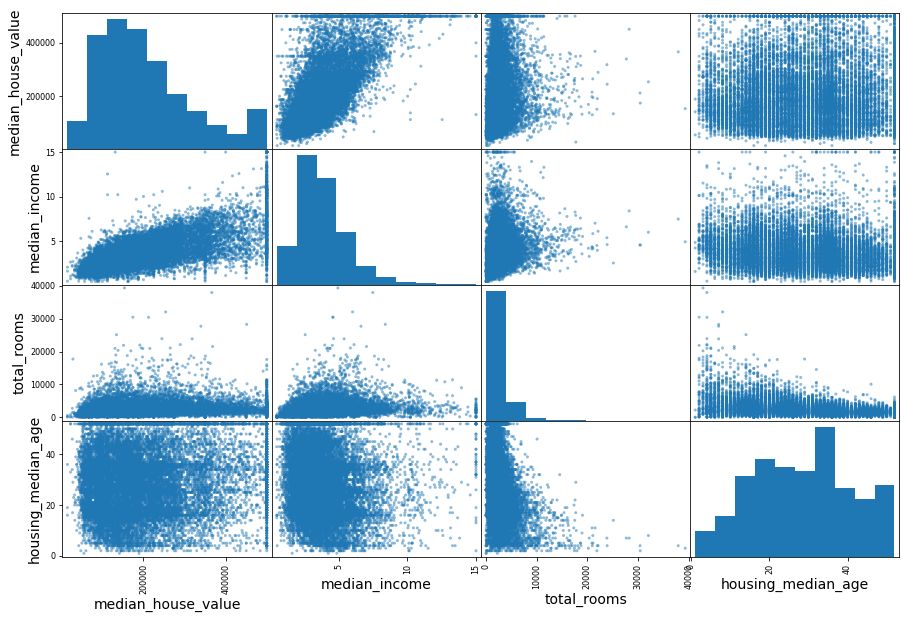

In [37]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value',
              'median_income',
              'total_rooms', 
              'housing_median_age',
              ]
scatter_matrix(df[attributes], figsize=(15,10))

In [39]:
corr_matrix['median_house_value'].sort_values(ascending=False)[1]

0.6871599924390881

In [40]:
df.columns[1]

'latitude'

In [45]:
output = corr_matrix['median_house_value'].sort_values(ascending=False)
print(f'{output}')
print(f'{type(output)}')

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64
<class 'pandas.core.series.Series'>


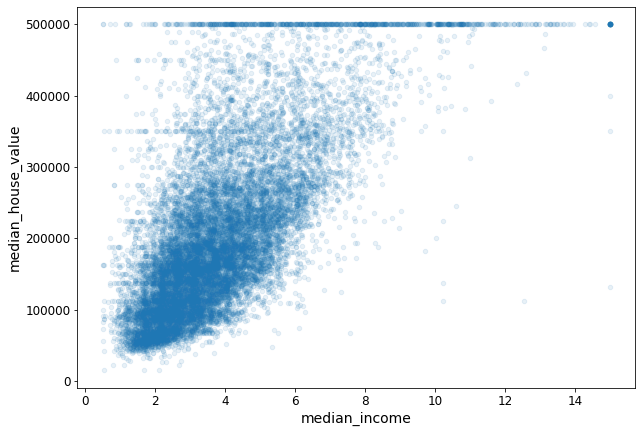

In [47]:
df.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, figsize=(10,7))

In [0]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [50]:
corr_matrix = df.corr(method='pearson')
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [0]:
df = strat_train_set.drop('median_house_value', axis=1)
df_labels = strat_train_set['median_house_value'].copy()

In [0]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [54]:
df_num = df.drop('ocean_proximity', axis=1)

imputer.fit(X=df_num)

imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [55]:
df_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [0]:
X = imputer.transform(df_num)

In [0]:
df_tr = pd.DataFrame(data=X, columns=df_num.columns, index=df_num.index)

In [60]:
print(f"{type(df['ocean_proximity'])}")
print(f"{type(df[['ocean_proximity']])}")

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [62]:
df_cat = df[['ocean_proximity']]
df_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [68]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
print(f'{type(df_cat_encoded)}')
df_cat_encoded[:10]

<class 'numpy.ndarray'>


array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [69]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]